# SVD for Image Compression 

In [61]:
import numpy as np
from numpy.linalg import svd

from skimage.io import imread
import matplotlib.pyplot as plt

# Color image

width:   626
height:  487
channel: 3


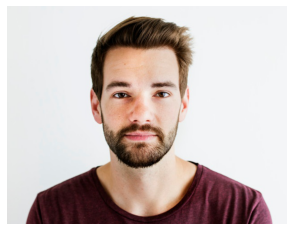

In [62]:
# Import the image
pic_rgb = imread('pic.jpg')

h, w, c = pic_rgb.shape
print('width:  ', w)
print('height: ', h)
print('channel:', c)

plt.imshow(pic_rgb)
plt.axis('off')
plt.show()

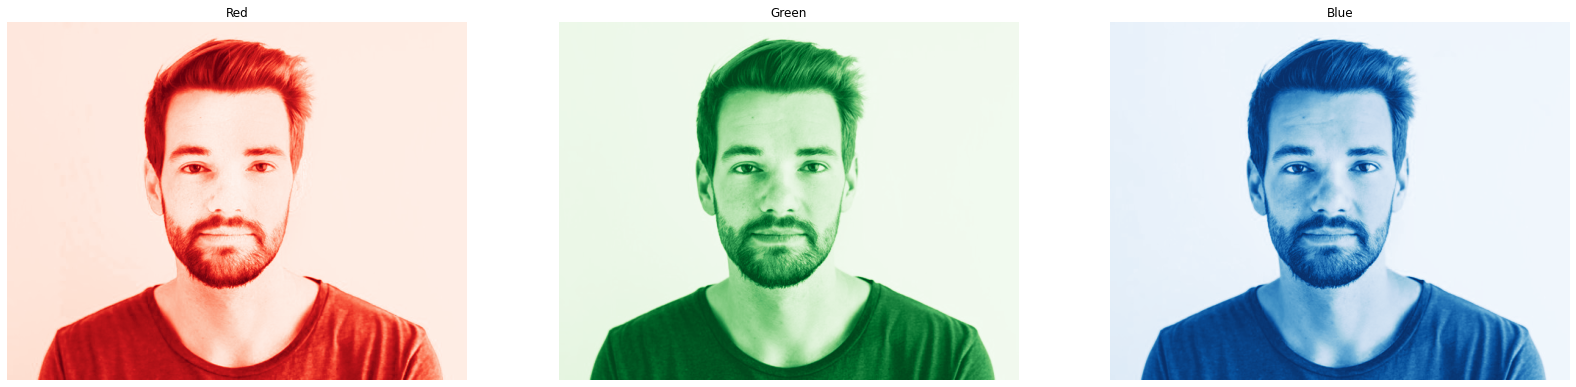

In [63]:
# Split the picture into Red, Green and Blue
pic_r = pic_rgb[:, :, 0]
pic_g = pic_rgb[:, :, 1]
pic_b = pic_rgb[:, :, 2]

# Picture the data obtained
fig, axes = plt.subplots(1, 3)

##Red
axes[0].imshow(pic_r, cmap="Reds_r")
axes[0].axis('off')
axes[0].set_title('Red')

##Green
axes[1].imshow(pic_g, cmap="Greens_r")
axes[1].axis('off')
axes[1].set_title('Green')

##Blue
axes[2].imshow(pic_b, cmap="Blues_r")
axes[2].axis('off')
axes[2].set_title('Blue')

fig.set_figwidth(28)
fig.set_figheight(14)

plt.show()

In [64]:
# SVD decomposition for Red, Green and Blue
U_r, s_r, VT_r = svd(pic_r, full_matrices=False)
U_g, s_g, VT_g = svd(pic_g, full_matrices=False)
U_b, s_b, VT_b = svd(pic_b, full_matrices=False)

Uncompressed image size:  304862
Compressed image size:  233940
The compressed image is: 76.74% of the original image


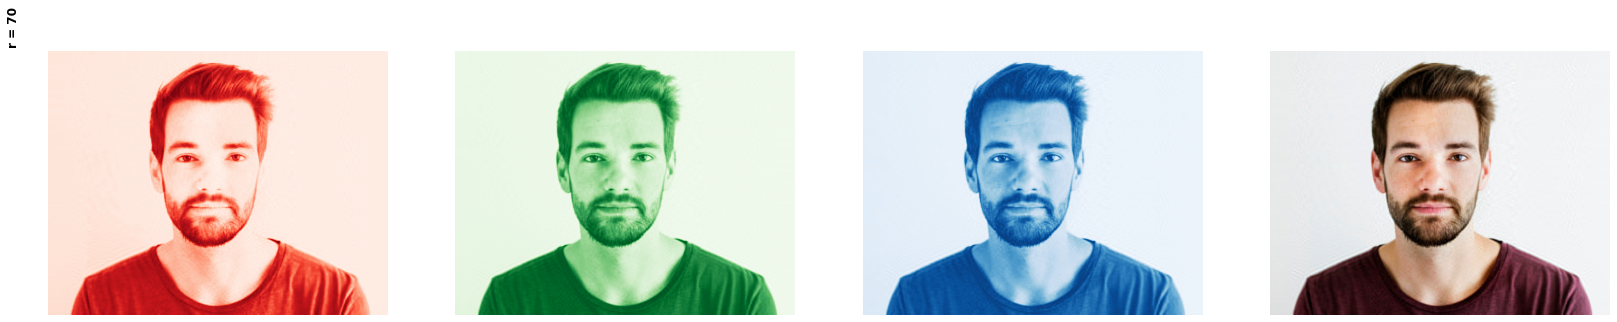

In [65]:
r=70    # r is the number of singular values used

# Restoring the image
pic_reduce_r = U_r[:, :r] @ np.diag(s_r[:r]) @ VT_r[:r, :]
pic_reduce_g = U_g[:, :r] @ np.diag(s_g[:r]) @ VT_g[:r, :]
pic_reduce_b = U_b[:, :r] @ np.diag(s_b[:r]) @ VT_b[:r, :]

# Picture the data obtained
fig, axes = plt.subplots(1, 4)

##Red
axes[0].imshow(pic_reduce_r, cmap="Reds_r")
axes[0].axis('off')
axes[0].set_title('r = ' + str(r), rotation="vertical",
                  position=(-.1, .42), fontweight='bold')

##Green
axes[1].imshow(pic_reduce_g, cmap="Greens_r")
axes[1].axis('off')

##Blue
axes[2].imshow(pic_reduce_b, cmap="Blues_r")
axes[2].axis('off')


pic_reduce_rgb = np.stack(
    [pic_reduce_r, pic_reduce_g, pic_reduce_b], axis=2)

# Crop values to the range [0, 255]
pic_reduce_rgb[pic_reduce_rgb < 0.] = 0
pic_reduce_rgb[pic_reduce_rgb > 255.] = 255

# Picture the whole data obtained
axes[3].imshow(pic_reduce_rgb.astype('uint8'))
axes[3].axis('off')

fig.set_figwidth(28)
fig.set_figheight(14)

uncompressed_img_size = h*w
compressed_img_size = r*(1+h+w)*3
ratio = compressed_img_size *1.0 / uncompressed_img_size

print('Uncompressed image size: ', uncompressed_img_size)
print('Compressed image size: ', compressed_img_size)
print('The compressed image is: ' + str(round (ratio * 100, 2)) + '% of the original image')


plt.show()